In [8]:
import requests as req
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import struct

In [3]:
import socket
TCP_IP = 'brushy.challs.cyberchallenge.it' 
TCP_PORT = 9240      
BUFFER_SIZE = 1024
MESSAGE = b'\xCC\x19'
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect((TCP_IP, TCP_PORT))
data = s.recv(BUFFER_SIZE)
print( "received data:", data)
s.send(MESSAGE)
data = s.recv(BUFFER_SIZE)
print( "received data:", data)

received data: b'A secret agent was identified in a internet cafe while transmitting secret codes to a foreign country. He was trained not to use the keyboard so to avoid keyloggers. The stealth monitoring routine installed in the OS transmitted back to our servers interesting data collected from the mice device. Your mission, should you decide to accept it, is to recover the secret from the dump that we will stream on this secure and high-speed 200 kbit/s ISDN line. As always, should you or any of your CC Force be caught or killed, the Secretary will disavow any knowledge of your actions. Send \\xCC\\x19 to accept the mission.\n\nThis message will self-destruct in five seconds. Good luck, Agent.\n\n'
received data: b'18fe00080100080404080705080805080e05081206081804'


In [6]:
def plt_coordinate(coordinates):
    x_values = [coord[0] for coord in coordinates]
    y_values = [coord[1] for coord in coordinates] 

    plt.plot(x_values, y_values, 'bo')
    plt.grid(True)
    plt.show()

In [52]:
def decode_input_mice(decoded_bytes):
    prev_x = 0
    prev_y = 0
    coordinates = []

    for i in range(0, len(decoded_bytes)-2, 3):
        if data:
            left = decoded_bytes[i] & 0x1
            #right = decoded_bytes[i] & 0x2
            #middle = decoded_bytes[i] & 0x4

            delta_x, delta_y = struct.unpack("bb", decoded_bytes[i+1:i+3])
            #print(delta_x, delta_y)
            
            x = prev_x + delta_x
            y = prev_y + delta_y 

            prev_x = x
            prev_y = y

            if left > 0: coordinates.append((x, y))

            if left == 0 and coordinates != []:
                plt_coordinate(coordinates)
                coordinates = []

    return coordinates


Connected to brushy.challs.cyberchallenge.it on port 9240
Received: A secret agent was identified in a internet cafe while transmitting secret codes to a foreign country. He was trained not to use the keyboard so to avoid keyloggers. The stealth monitoring routine installed in the OS transmitted back to our servers interesting data collected from the mice device. Your mission, should you decide to accept it, is to recover the secret from the dump that we will stream on this secure and high-speed 200 kbit/s ISDN line. As always, should you or any of your CC Force be caught or killed, the Secretary will disavow any knowledge of your actions. Send \xCC\x19 to accept the mission.

This message will self-destruct in five seconds. Good luck, Agent.


514290


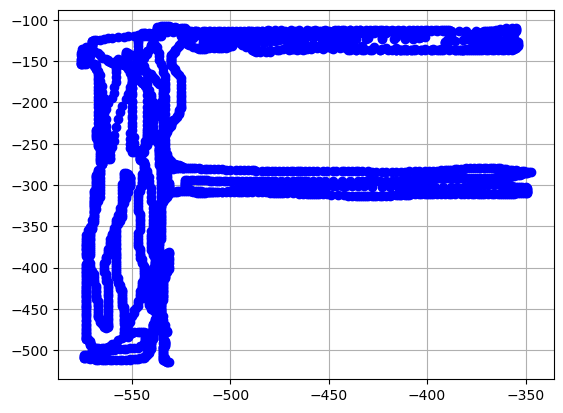

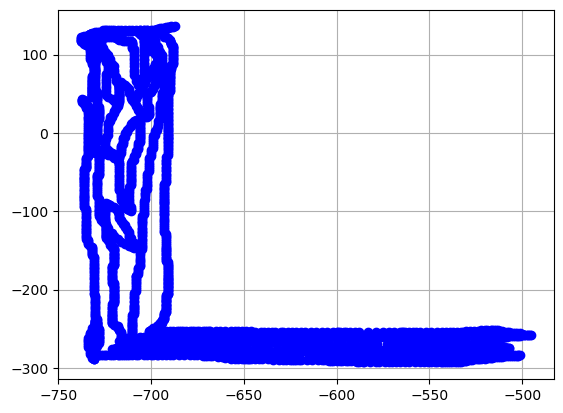

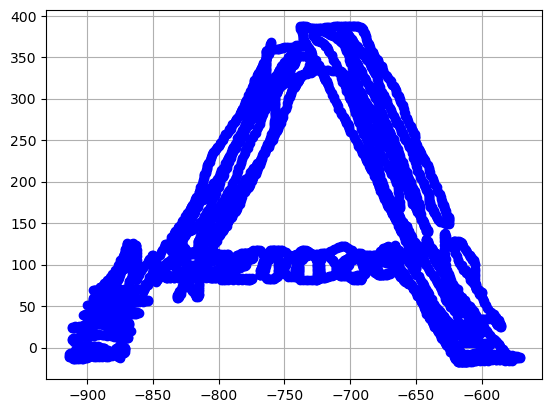

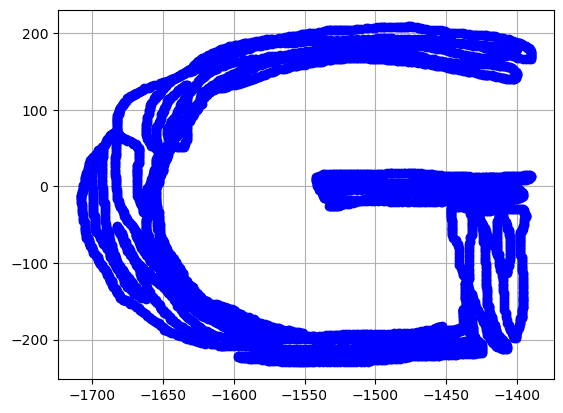

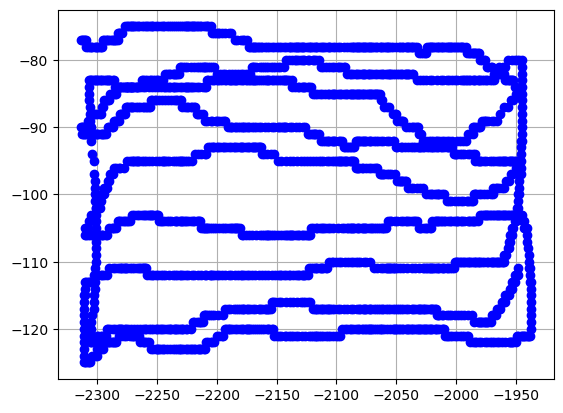

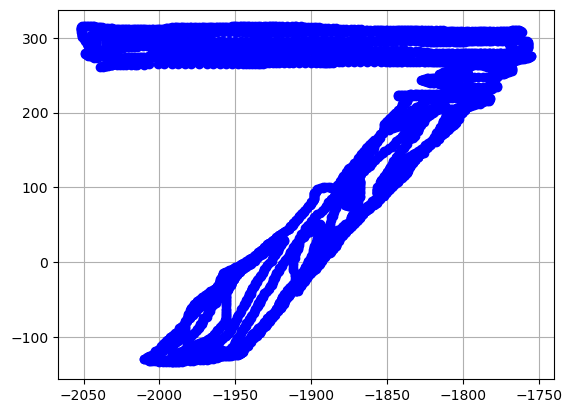

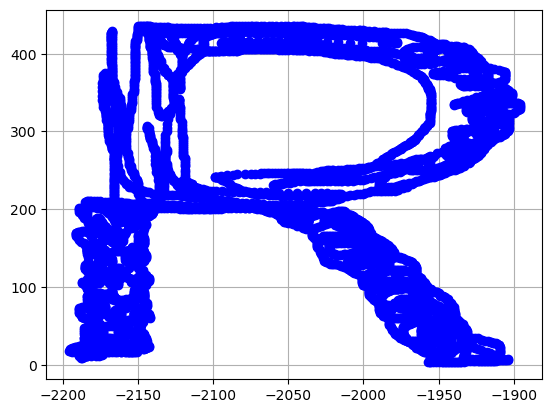

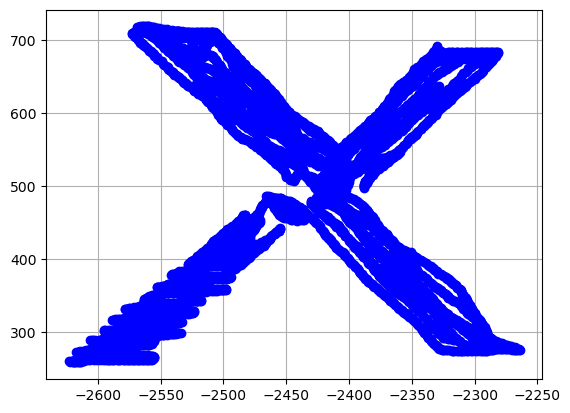

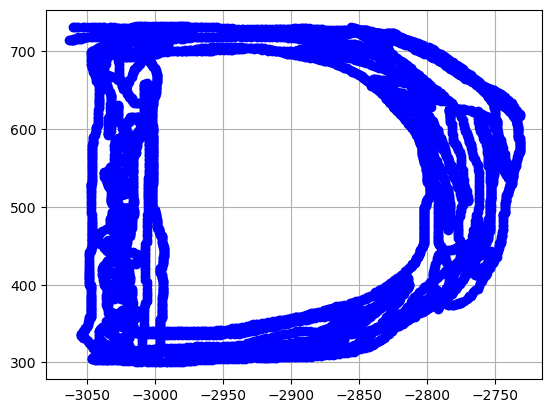

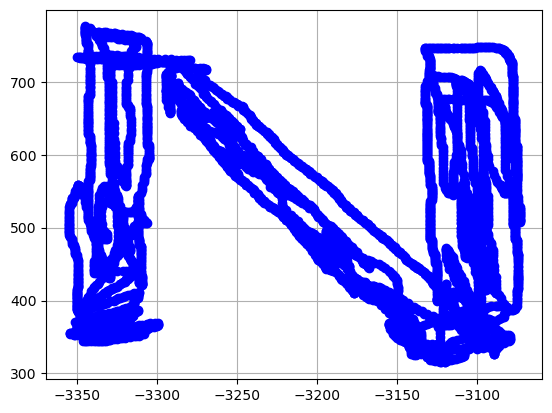

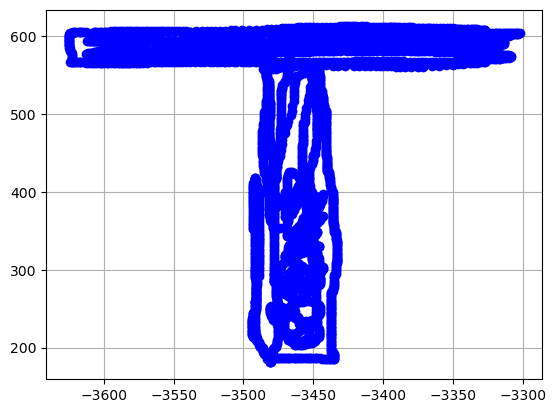

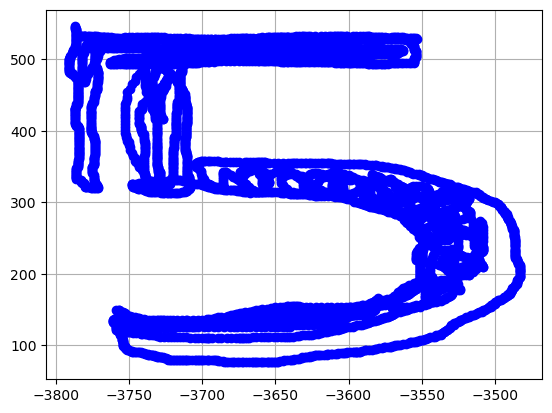

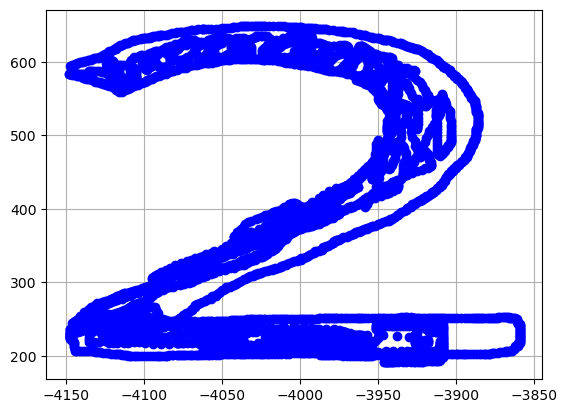

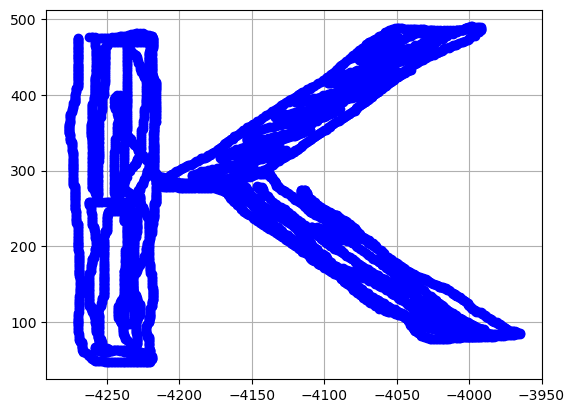

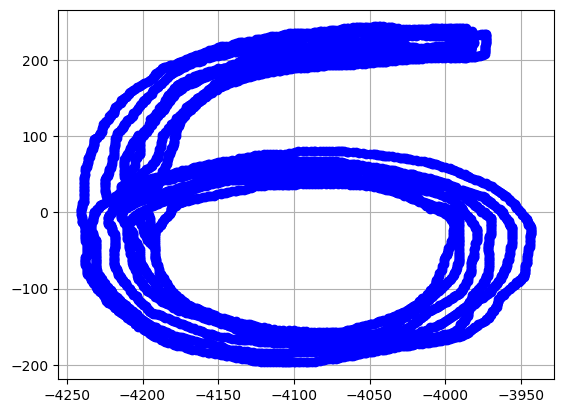

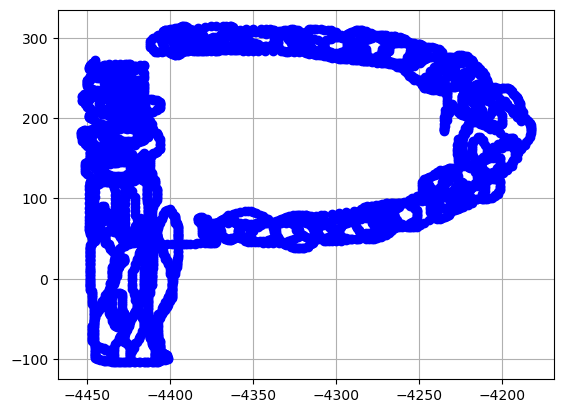

In [53]:
host = 'brushy.challs.cyberchallenge.it'
port = 9240
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
paresd_data = ""

try:
    s.connect((host, port))
    print("Connected to", host, "on port", port)
    data = s.recv(1024)
    print("Received:", data.decode())
    s.send(b'\xCC\x19')

    while True:
        received_data = s.recv(1024).decode()
        if len(received_data) == 0: break
        paresd_data += received_data
    
    print(len(paresd_data))
    coordinates = decode_input_mice(bytes.fromhex(paresd_data))
    #plt_coordinate(coordinates)
    
        
except Exception as e:
    print("An error occurred:", e)
finally:
    s.close()